In [1]:
import scipy as sp
import matplotlib.pylab as plt
import seaborn as sea
import pandas as pd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [14]:
from example import read_games
recs = list(read_games())

In [15]:
from collections import defaultdict
topkeys = defaultdict(int)
for rec in recs:
    for k in rec['data'].keys():
        topkeys[k] += 1
print(list(sorted(topkeys.keys())))

['about_the_game', 'achievements', 'background', 'categories', 'controller_support', 'demos', 'detailed_description', 'developers', 'dlc', 'drm_notice', 'ext_user_account_notice', 'genres', 'header_image', 'is_free', 'legal_notice', 'linux_requirements', 'mac_requirements', 'metacritic', 'movies', 'name', 'package_groups', 'packages', 'pc_requirements', 'platforms', 'price_overview', 'publishers', 'recommendations', 'release_date', 'required_age', 'reviews', 'screenshots', 'short_description', 'steam_appid', 'support_info', 'supported_languages', 'type', 'website']


In [16]:
for ky,tot in sorted(topkeys.items()):
    count = 0
    uniq = set()
    mn, mx = None, None
    
    for rec in recs:
        val = rec['data'].get(ky, None)
        if not val:
            continue
        count += 1
        if isinstance(val, dict):
            val = "<DICT>"
        elif isinstance(val, list):
            val = "<LIST>"
        else:
            val = str(val).strip()
        uniq.add(val)
        if mn is None or val < mn:
            mn = val
        if mx is None or val > mx:
            mx = val
    print("%-25s %8d %8d %20s %20s" % (ky, tot, len(uniq), str(mn)[:20], str(mx)[:20]))
        

about_the_game               12516    11712 !nsane is a nod to t 日本語バージョンダウンロード開始されまし
achievements                  6773        1               <DICT>               <DICT>
background                   12516    11666 http://cdn.akamai.st http://cdn.akamai.st
categories                   12281        1               <LIST>               <LIST>
controller_support            3480        1                 full                 full
demos                         1159        1               <LIST>               <LIST>
detailed_description         12516    11713 !nsane is a nod to t 日本語バージョンダウンロード開始されまし
developers                   11881        1               <LIST>               <LIST>
dlc                           2107        1               <LIST>               <LIST>
drm_notice                      82       43 Act Control<br>5 mac                valve
ext_user_account_notice        144       89 1C Game Studios Acco       www.doak.co.za
genres                       11773        1           

In [17]:
from random import choice
from collections import Counter
from pprint import PrettyPrinter
pp = PrettyPrinter(width=120)
pprint = pp.pprint

def fields(name):
    for rec in recs:
        v = rec['data'].get(name, None)
        if v:
            yield v
            
field_values = list(fields('support_info'))
def out(v):
    pprint(v)
    print("")
out(field_values[0])
out(field_values[-1])
for _ in range(10):
    out(choice(field_values))


# def scan_values():
#     for fv in field_values:
#         free, purchase, subscript = False, False, False
#         for pg in fv:
#             if pg.get('is_recurring_subscription', '') == 'true':
#                 subscript = True
#             for s in pg.get('subs', list()):
#                 if s.get('is_free_license', None):
#                     free = True
#                 elif s.get('price_in_cents_with_discount', 0) > 0:
#                     purchase = True
#         yield (free, purchase, subscript)
# pprint(Counter(list(scan_values())))
           
# pprint(Counter([k for fv in field_values for k in fv.keys()]))

# pprint(Counter([i.get('description', 'MISSING').lower() for fv in field_values for i in fv]))

{'email': '', 'url': 'http://steamcommunity.com/app/10'}

{'email': 'info@overflowgames.se', 'url': 'www.overflowgames.se'}

{'email': '', 'url': ''}

{'email': 'contact@celsiusgs.com', 'url': ''}

{'email': 'CassataGames@gmail.com', 'url': 'https://www.facebook.com/truediamondgame'}

{'email': 'support@jellyvisiongames.zendesk.com', 'url': 'https://jellyvisiongames.zendesk.com/home'}

{'email': '', 'url': ''}

{'email': 'support@strategyfirst.com', 'url': ''}

{'email': 'support@digtribe.com', 'url': 'www.playkungfustrike.com'}

{'email': 'tech@singularity.kz', 'url': 'http://singularity.kz/en/'}

{'email': '', 'url': ''}

{'email': 'support@doublefine.com', 'url': ''}



## Categories

Each of these should be boolean column (from list of dict's, check 'description')

* Co-op:Co-op|Local Co-op|Online Co-op
* Multiplayer:Cross-Platform Multiplayer|Local Multi-Player|Multi-player|Online Multi-Player|Shared/Split Screen
* In-App Purchases
* Includes Source SDK
* Includes level editor
* MMO
* Single-player
* VR Support

## Genres

Like categories, it's a list of dicts. Use the dict['description'] for text and discretize:

If description is empty string, then ignore it.

All descriptions not described below are GenreIsOther

These descriptions become GenreIsXXX:

* indie
* action
* adventure
* casual
* strategy
* rpg
* simulation
* early access
* free to play
* sports
* racing
* massively multiplayer

These description become GenreIsNotGame:

* utilities
* design & illustration
* animation & modeling
* software training
* education
* audio production
* video production
* web publishing
* photo editing
* accounting


## Requirements

Applied to linux_requirements, mac_requirements, and pc_requirements

Value is dictionary with possible keys:

* minimum
* recommended

Turn into boolean, i.e.

* LinuxReqsHaveMin = True if val.get('minimum', '') else False
* LinuxReqsHaveRec = True if val.get('recommended', '') else False
* MacReqsHaveMin = True if val.get('minimum', '') else False
* MacReqsHaveRec = True if val.get('recommended', '') else False
* PCReqsHaveMin = True if val.get('minimum', '') else False
* PCReqsHaveRec = True if val.get('recommended', '') else False


## Package Groups

3 boolean columns: FreeVerAvail, PurchaseAvail, SubscriptionAvail

Code for all:

````
def package_groups(rec):
    pgs = rec.get("data", dict()).get("package_groups", list)
    free, purchase, subscript = False, False, False
    for pg in pgs:
        if pg.get('is_recurring_subscription', '') == 'true':
            subscript = True
        for s in pg.get('subs', list()):
            if s.get('is_free_license', None):
                free = True
            elif s.get('price_in_cents_with_discount', 0) > 0:
                purchase = True
    return (free, purchase, subscript)
````


In [18]:
# Attempt to read our shiny CSV file
gf = pd.read_csv('games-features.csv')
print(gf.columns)
gf.head()

Index(['QueryID', 'ResponseID', 'QueryName', 'ResponseName', 'ReleaseDate',
       'RequiredAge', 'DemoCount', 'DeveloperCount', 'DLCCount', 'Metacritic',
       'MovieCount', 'PackageCount', 'RecommendationCount', 'PublisherCount',
       'ScreenshotCount', 'AchievementCount', 'AchievementHighlightedCount',
       'ControllerSupport', 'IsFree', 'FreeVerAvail', 'PurchaseAvail',
       'SubscriptionAvail', 'PlatformWindows', 'PlatformLinux', 'PlatformMac',
       'PCReqsHaveMin', 'PCReqsHaveRec', 'LinuxReqsHaveMin',
       'LinuxReqsHaveRec', 'MacReqsHaveMin', 'MacReqsHaveRec',
       'CategorySinglePlayer', 'CategoryMultiplayer', 'CategoryCoop',
       'CategoryMMO', 'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'GenreIsNonGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'GenreIsStrategy', 'GenreIsRPG', 'GenreIsSimulation',
       'GenreIsEarlyAccess', 'GenreIsFreeToPlay', 'GenreIsSp

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,Background,ShortDescrip,DetailedDescrip,DRMNotice,ExtUserAcctNotice,HeaderImage,LegalNotice,Reviews,SupportedLanguages,Website
0,10,10,Counter-Strike,Counter-Strike,Nov 1 2000,0,0,1,0,88,...,http://cdn.akamai.steamstatic.com/steam/apps/1...,,Play the worlds number 1 online action game. E...,,,http://cdn.akamai.steamstatic.com/steam/apps/1...,,,English French German Italian Spanish Simplifi...,None
1,20,20,Team Fortress Classic,Team Fortress Classic,Apr 1 1999,0,0,1,0,0,...,http://cdn.akamai.steamstatic.com/steam/apps/2...,,One of the most popular online action games of...,,,http://cdn.akamai.steamstatic.com/steam/apps/2...,,,English French German Italian Spanish,None
2,30,30,Day of Defeat,Day of Defeat,May 1 2003,0,0,1,0,79,...,http://cdn.akamai.steamstatic.com/steam/apps/3...,,Enlist in an intense brand of Axis vs. Allied ...,,,http://cdn.akamai.steamstatic.com/steam/apps/3...,,,English French German Italian Spanish,http://www.dayofdefeat.com/
3,40,40,Deathmatch Classic,Deathmatch Classic,Jun 1 2001,0,0,1,0,0,...,http://cdn.akamai.steamstatic.com/steam/apps/4...,,Enjoy fast-paced multiplayer gaming with Death...,,,http://cdn.akamai.steamstatic.com/steam/apps/4...,,,English French German Italian Spanish,None
4,50,50,Half-Life: Opposing Force,Half-Life: Opposing Force,Nov 1 1999,0,0,1,0,0,...,http://cdn.akamai.steamstatic.com/steam/apps/5...,,Return to the Black Mesa Research Facility as ...,,,http://cdn.akamai.steamstatic.com/steam/apps/5...,,,English French German Korean,None


DemoCount  > 0
count    1159.000000
mean        1.001726
std         0.041523
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: DemoCount, dtype: float64

DLCCount  > 0
count    2107.000000
mean        5.059801
std        24.835857
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       630.000000
Name: DLCCount, dtype: float64

RecommendationCount  > 0
count       4861.000000
mean        3233.261057
std        25024.794157
min          101.000000
25%          201.000000
50%          442.000000
75%         1406.000000
max      1427633.000000
Name: RecommendationCount, dtype: float64



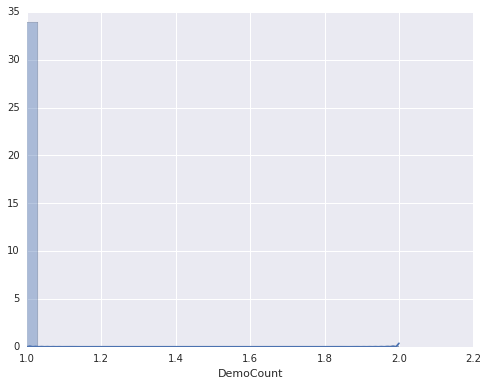

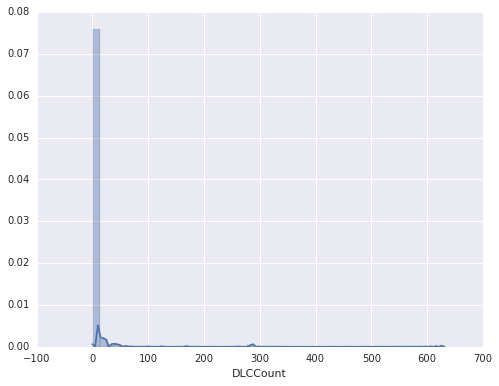

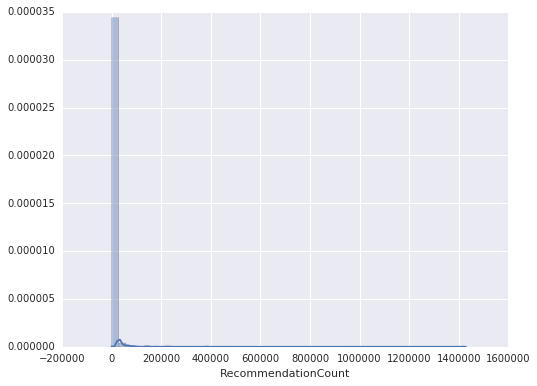

In [19]:
def invest(cname):
    print(cname, " > 0")
    nums = gf[gf[cname] > 0][cname]
    print(nums.describe())
    plt.figure(figsize=(8,6))
    sea.distplot(nums)
    print("")
invest("DemoCount")
invest("DLCCount")
invest("RecommendationCount")